## Importing libraries

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [68]:
data = pd.read_excel("/content/health_sites_sdn.xlsx")
data.head()

,Name,X,Y,amenity,changeset_id,changeset_timestamp,changeset_user,changeset_version,completeness,dispensing,osm_id,osm_type,uuid
0,NaN,32.536152,15.632537,pharmacy,5985975.0,6/14/218 8:48:56 PM,allasafieldin,1.0,12.0,yes,569166866,node,62a1f69b5e464b3a831724e7e633b9f7
1,NaN,NaN,NaN,hospital,8292351.0,2022-04-01 11:29:56,AARod,1.0,9.0,NaN,78655555,way,6bed7ba76fdc43f2a95998df295b6c8
2,NaN,32.533961,15.528663,pharmacy,368587.0,5/1/215 9:28:35 AM,AhmedSDN,1.0,6.0,NaN,349668393,node,516a3ec3daf43e68f1ca8c8564d169
3,Wad Musa Pharmacy,32.441141,15.683439,pharmacy,89779217.0,2022-08-22 12:03:41,ImadJ,1.0,15.0,yes,783474444,node,77c5b4989945198ecfa5b45bd5c6b
4,NaN,NaN,NaN,hospital,61428897.0,8/7/218 9:45:25 AM,ali-hasboo,1.0,12.0,NaN,61475321,way,5888223145234835bd211b5475c469


##Understanding Dataset

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1109 non-null   object 
 1   X                    1155 non-null   float64
 2   Y                    1155 non-null   float64
 3   amenity              1171 non-null   object 
 4   changeset_id         143 non-null    float64
 5   changeset_timestamp  143 non-null    object 
 6   changeset_user       143 non-null    object 
 7   changeset_version    143 non-null    float64
 8   completeness         143 non-null    float64
 9   dispensing           32 non-null     object 
 10  osm_id               1180 non-null   int64  
 11  osm_type             1180 non-null   object 
 12  uuid                 143 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 120.0+ KB


In [70]:
data.describe()

,X,Y,changeset_id,changeset_version,completeness,osm_id
count,1155.000000,1155.000000,1.430000e+02,143.000000,143.000000,1.180000e+03
mean,32.260834,15.507228,3.728067e+07,1.489510,11.853147,2.260107e+09
std,2.738104,0.773112,3.558538e+07,0.812466,4.001686,2.871877e+09
min,3.394669,2.748716,3.796400e+04,1.000000,6.000000,6.748400e+04
25%,32.487400,15.543592,7.497255e+06,1.000000,9.000000,7.412415e+07
50%,32.535686,15.598696,1.199933e+07,1.000000,12.000000,6.985134e+08
75%,32.573373,15.647957,7.674942e+07,2.000000,15.000000,4.638766e+09
max,37.217447,19.711213,9.285484e+07,6.000000,24.000000,1.192483e+10


### Removing urelated columns

In [71]:
data=data.drop(['changeset_id','changeset_timestamp','changeset_user','changeset_version','changeset_version','completeness','dispensing','uuid'],axis=1)

In [72]:
data.head()

,Name,X,Y,amenity,osm_id,osm_type
0,NaN,32.536152,15.632537,pharmacy,569166866,node
1,NaN,NaN,NaN,hospital,78655555,way
2,NaN,32.533961,15.528663,pharmacy,349668393,node
3,Wad Musa Pharmacy,32.441141,15.683439,pharmacy,783474444,node
4,NaN,NaN,NaN,hospital,61475321,way


In [73]:
data.isnull().sum()

,0
Name,71
X,25
Y,25
amenity,9
osm_id,0
osm_type,0


### Removing values with null co-ordinates

In [74]:
data = data.dropna(subset = ['X'])

In [75]:
data.isnull().sum()

,0
Name,60
X,0
Y,0
amenity,9
osm_id,0
osm_type,0


In [76]:
data

,Name,X,Y,amenity,osm_id,osm_type
0,NaN,32.536152,15.632537,pharmacy,569166866,node
2,NaN,32.533961,15.528663,pharmacy,349668393,node
3,Wad Musa Pharmacy,32.441141,15.683439,pharmacy,783474444,node
5,Ombada Model Hospital,32.419732,15.663948,hospital,7966428285,node
6,Tropical Medicine Hospital,32.493623,15.642787,hospital,86766734,node
...,...,...,...,...,...,...
1175,Spring Wellness Pharmacy,32.621261,15.616224,pharmacy,682453499,nodes
1176,Abu Arwa Pharmacy,32.611852,15.627639,pharmacy,6824687155,nodes
1177,Dr. Rahmi Pharmacy,32.495810,15.642253,pharmacy,8676963,nodes
1178,NaN,32.539242,15.546399,pharmacy,1685325,nodes


In osm_type column changes nodes to node

In [77]:
data['osm_type'].replace('nodes','node', inplace=True)

<ipython-input-77-2ba8289d0229>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['osm_type'].replace('nodes','node', inplace=True)


In [78]:
data

,Name,X,Y,amenity,osm_id,osm_type
0,NaN,32.536152,15.632537,pharmacy,569166866,node
2,NaN,32.533961,15.528663,pharmacy,349668393,node
3,Wad Musa Pharmacy,32.441141,15.683439,pharmacy,783474444,node
5,Ombada Model Hospital,32.419732,15.663948,hospital,7966428285,node
6,Tropical Medicine Hospital,32.493623,15.642787,hospital,86766734,node
...,...,...,...,...,...,...
1175,Spring Wellness Pharmacy,32.621261,15.616224,pharmacy,682453499,node
1176,Abu Arwa Pharmacy,32.611852,15.627639,pharmacy,6824687155,node
1177,Dr. Rahmi Pharmacy,32.495810,15.642253,pharmacy,8676963,node
1178,NaN,32.539242,15.546399,pharmacy,1685325,node


### Column types
- Name - Name of hospitals
- X,Y - Numerical (Co-ordinates)
- amenity - Categorical
- osm_id - Numerical
- osm_type - categorical

## Univariate analysis
Column - Amenity

**Conclusion**
- Most of the health facilities are 'Pharmacy' 81.6%
- only 9 values are missing

In [80]:
data['amenity'].value_counts()

,count
amenity,
pharmacy,935
clinic,94
hospital,79
dentist,23
doctors,15


<Axes: xlabel='amenity', ylabel='count'>

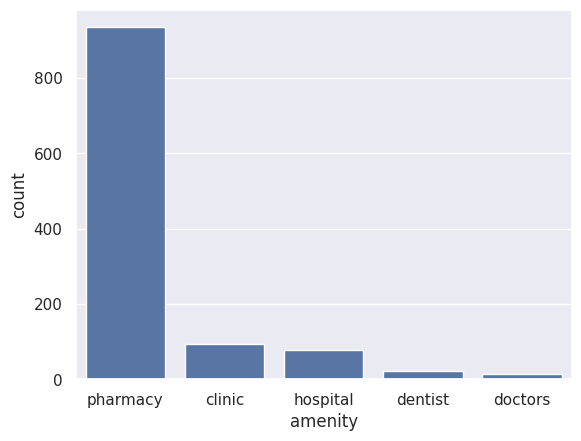

In [87]:
sns.barplot(data['amenity'].value_counts())

In [84]:
data['amenity'].isnull().sum()

9

<Axes: ylabel='count'>

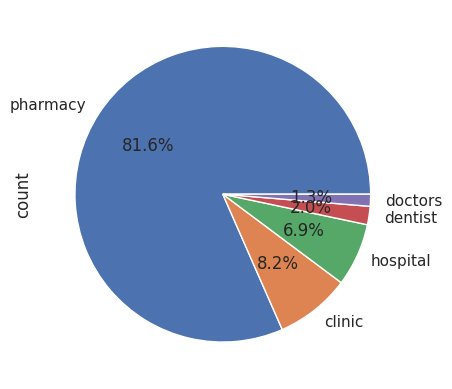

In [90]:
data['amenity'].value_counts().plot(kind='pie',autopct='%0.1f%%')

## Column osm type
- All osm types are 'node'

In [91]:
data['osm_type'].value_counts()

,count
osm_type,
node,1155


In [92]:
data['osm_type'].isnull().sum()

0

Now replacing unknown anemity with others

In [93]:
data['amenity'].replace('','other',inplace=True)

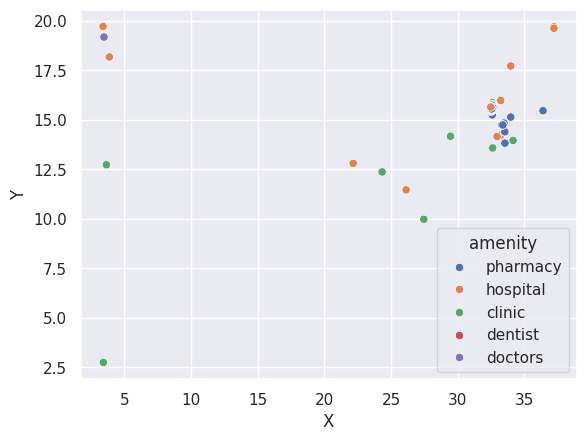

In [94]:
sns.scatterplot(x=data['X'],y=data['Y'],hue=data['amenity'])
plt.show()

## Plotting the co-ordinates in map

In [96]:
import folium

map = folium.Map(location=[12.8628, 30.2176], zoom_start=6)  # Center on Sudan
for _, row in data.iterrows():
    folium.Marker([row['Y'], row['X']], popup=row['amenity']).add_to(map)
map.save("map.html")


In [97]:
map
